Donwload the ephimeres data for Neptune, Uranus, Saturn and Jupiter from the following lik and upload it in the notebook's files before running the code:
https://drive.google.com/drive/folders/1jTIP4iSCrfoqdKXt4sUcwocLxYqIx8uG?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as sc
import math

In [2]:
#Importing the position vectors of the 4 planets.
Neptune=pd.read_excel("Neptune ephimeres.xlsx", header=0, index_col=0, skiprows=[0], usecols=[1,2,3,4])
Uranus=pd.read_excel("Uranus ephimeres.xlsx", header=0, index_col=0, skiprows=[0], usecols=[1,2,3,4])
Saturn=pd.read_excel("Saturn ephimeres.xlsx", header=0, index_col=0, skiprows=[0], usecols=[1,2,3,4])
Jupiter=pd.read_excel("Jupiter ephimeres.xlsx", header=0, index_col=0, skiprows=[0], usecols=[1,2,3,4])

Uv=pd.read_excel("Uranus ephimeres.xlsx", header=0, index_col=0, skiprows=[0], usecols=[4,5,6,7])

#Converting it to an array here
Neptune=Neptune.to_numpy()
Uranus=Uranus.to_numpy()
Saturn=Saturn.to_numpy()
Jupiter=Jupiter.to_numpy()
Uv=Uv.to_numpy()
Uv=Uv*365.24218750 #To convert from au/day to au/year

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
Time=np.array(range(2698))
Time=Time/12+1800 #years
T=Neptune-Uranus

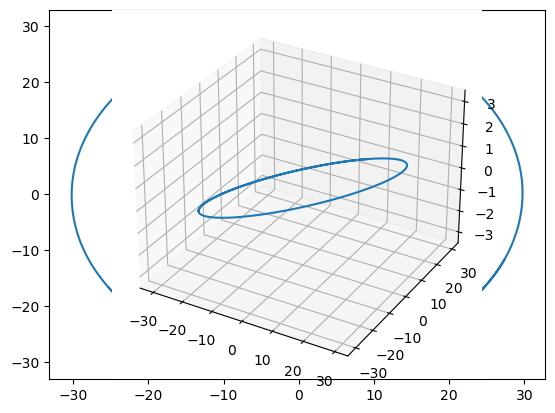

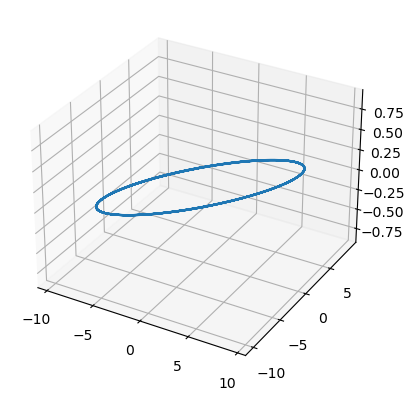

In [4]:
Nx,Ny,Nz=Neptune.T
plt.plot(Nx,Ny)
ax = plt.axes(projection='3d')
ax.plot3D(Nx,Ny,Nz)
plt.show()
bx = plt.axes(projection='3d')
Sx,Sy,Sz=Saturn.T
bx.plot3D(Sx,Sy,Sz)

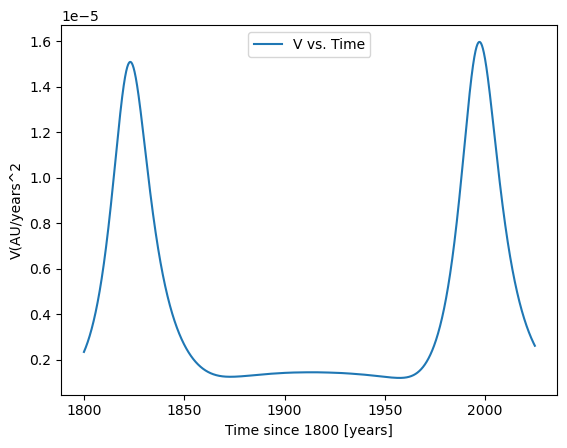

In [5]:
from scipy.constants import G
G=G*(365.24218750*86400)**2/(149597870700)**3 #Accurate conversion to kg(AU)^3/(year)^2
M_N=1.024e26
#Here I obtain the value of V using the position vectors of Neptune itself to
#see if a correct graph can be obtained

V1=Neptune-Uranus

Nx,Ny,Nz=Neptune.T
Ux,Uy,Uz=Uranus.T

Vv2=((Nx-Ux)**2+(Ny-Uy)**2+(Nz-Uz)**2)**(3/2) #10^3

V2= np.tile(Vv2, (3,1))
V2=np.transpose(V2)

Vv3=((Nx)**2+(Ny)**2+(Nz)**2)**(3/2) #10^3

V3= np.tile(Vv3, (3,1))
V3=np.transpose(V3)

V=G*M_N*(V1/V2-Neptune/V3)
Vx,Vy,Vz=V.T
V_mag=((Vx)**2+(Vy)**2+(Vz)**2)**(1/2)
plt.plot(Time,V_mag,label="V vs. Time")

plt.xlabel("Time since 1800 [years]")
plt.ylabel("V(AU/years^2")
plt.legend(loc="upper center")

#The graph is accurate to the same degree of magnitude as described in the paper

In [6]:
#Here we compute V using the RHS

M_S=1.989e30 #Mass of the Sun
M_U=8.681e25 #Mass of Uranus
M_St=5.683e26
M_J=1.898e27

#############
#Second Term
#############
Vv23=((Ux)**2+(Uy)**2+(Uz)**2)**(1/2)
V2_2_3= np.tile(Vv23, (3,1))
V2_2_3=np.transpose(V2_2_3)

V2_2=G*(M_S+M_U)*Uranus/(V2_2_3**3)

############
#Third Term
############

#Saturn
Sx,Sy,Sz=Saturn.T

Sv2=((Sx-Ux)**2+(Sy-Uy)**2+(Sz-Uz)**2)**(3/2)
S2= np.tile(Sv2, (3,1))
S2=np.transpose(S2)

Sv3=((Sx)**2+(Sy)**2+(Sz)**2)**(3/2)
S3= np.tile(Sv3, (3,1))
S3=np.transpose(S3)

S=G*M_St*((Saturn-Uranus)/S2-Saturn/S3)

#Jupiter
Jx,Jy,Jz=Jupiter.T

Jv2=((Jx-Ux)**2+(Jy-Uy)**2+(Jz-Uz)**2)**(3/2)
J2= np.tile(Jv2, (3,1))
J2=np.transpose(J2)

Jv3=((Jx)**2+(Jy)**2+(Jz)**2)**(3/2)
J3= np.tile(Jv3, (3,1))
J3=np.transpose(J3)

J=G*M_J*((Jupiter-Uranus)/J2-Jupiter/J3)


V2_3=J+S

In [7]:
#Obtaining the acceleration of Uranus using the five point differentiation
#of its velocity vector


h=30/365.24218750 #it is the difference (time) between two consecutive points
#We divide it by 365.24 to convert it to years
XX=np.zeros(2698)
V2_1=np.tile(XX,(3,1))
#Print("Datatype:",V2_1.dtype)
V2_1=np.transpose(V2_1)
for i in range(2696):
    if i==0:
      continue
    if i==1:
      continue
    V2_1[i]=1/(12*h)*(Uv[i-2]-8*Uv[i-1]+8*Uv[i+1]-Uv[i+2])

#Hard coding the first and last 2 values in the array
#V2_1=V2_1
V2_1[0]=V2_1[2]
V2_1[1]=V2_1[2]
V2_1[2697]=V2_1[2695]
V2_1[2696]=V2_1[2695]

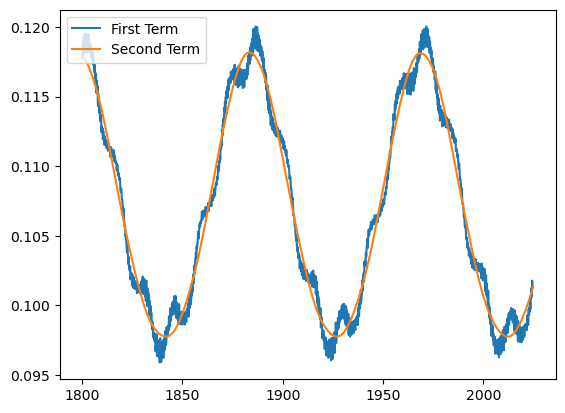

In [8]:
#Taking x,y, and z coordinates of the first term in V2
V21x,V21y,V21z=V2_1.T
Vr_magg=((V21x)**2+(V21y)**2+(V21z)**2)**(1/2)
plt.plot(Time,Vr_magg,label="First Term")

#Taking x,y, and z coordinates of the second term in V2
V22x,V22y,V22z=V2_2.T
Vr_maggg=((V22x)**2+(V22y)**2+(V22z)**2)**(1/2)
plt.plot(Time,Vr_maggg,label="Second Term")

#Taking x,y, and z coordinates of the third term in V2
V23x,V23y,V23z=V2_3.T
Vr_magggg=((V23x)**2+(V23y)**2+(V23z)**2)**(1/2)
#plt.plot(Time,Vr_magggg,label="Terms with Jupiter and Saturn")

plt.legend(loc="upper left")

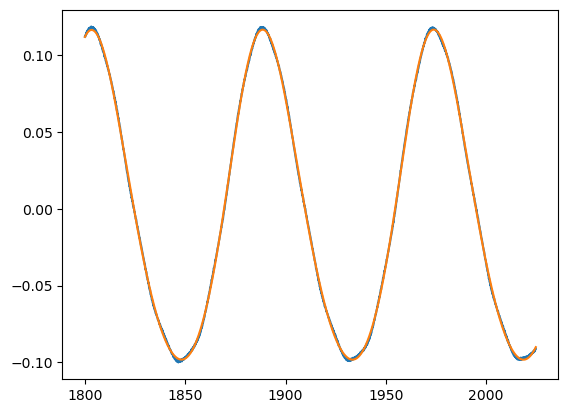

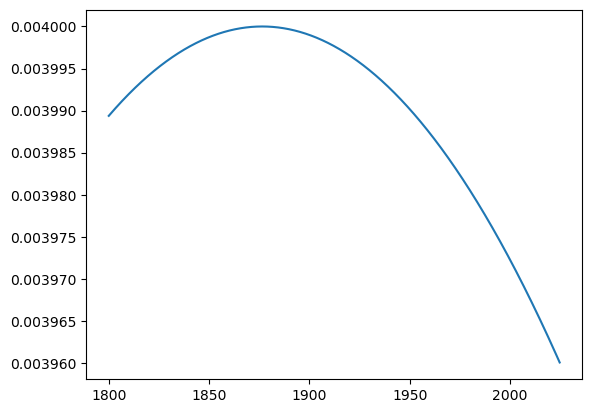

In [9]:
plt.plot(Time,V21x)
plt.plot(Time,-V22x)
plt.show()
Y=0.0143*np.sin(-0.00050416*Time+103.0478)-0.0103
plt.plot(Time,Y)
#plt.plot(Time,V23x)

# plt.plot(Time,V21y)
# plt.plot(Time,-V22y)
# #plt.plot(Time,V23y)

# plt.plot(Time,V21z)
# plt.plot(Time,-V22z)
# #plt.plot(Time,V23z)

## Curve Fitting to obtain a more accurate data set for the acceleration term

We will curve fit the velocity vector of Uranus and to obtain a closed form of its function and then differentiate it to obtain its acceleration

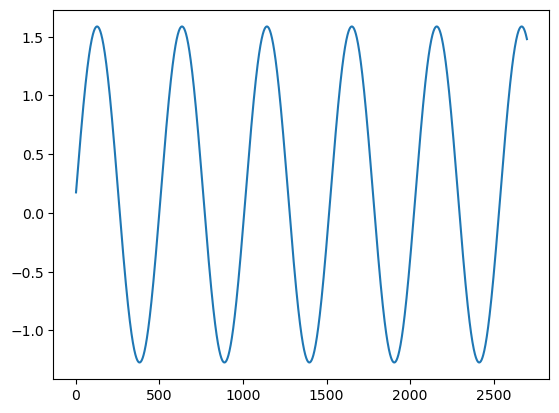

In [10]:
from scipy.optimize import curve_fit

yx,yy,yz=Uv.T #Separating out the x,y, and z coordinates of the Uranus velocity

#Guess values
guess_mean = np.mean(yx) #off-set:d 0.1573576483417295
# guess_std = 3*np.std(Vr_magg)/(2**0.5)/(2**0.5) #amplitude
guess_phase = 89
guess_freq = 0.00103092784*12
guess_amp = (max(yx)-min(yx))/2 # 1.4298978352188507

# From Matlab
# a =     0.0143
# f =   -5.0416e-04
# p =   103.0478
# o =    -0.0103
# Y=0.0143*np.sin(-0.00050416*Time+103.0478)-0.0103

# define the true objective function
def objective(x, a, b, c, d, e, f, g, h, i, j):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + (f * x**6)+(g * x**7)+(h * x**8)+(i * x**9)+j

x=np.arange(1,2699)

plt.plot(x,guess_amp*np.sin(guess_freq*x)+guess_mean)

# curve fit
popt, _ = curve_fit(objective, x, yx)
# summarize the parameter values
a, b, c, d, e, f, g, h, i, j = popt
# plot input vs output
#plt.scatter(x, y)

y_line = objective(x, a, b, c, d, e, f, g, h, i, j)

# plt.plot(x, y_line, '--', color='red')
#plt.plot(x,25000*yx)

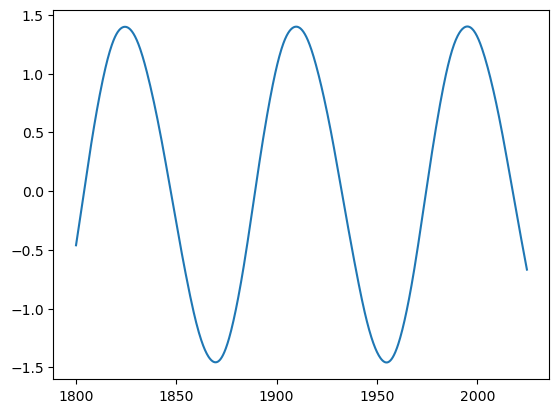

In [11]:
# v_max=max(yx)
# v_min=min(yx)
# print(v_max)
# print(v_min)
plt.plot(Time,yx)
# print((max(yx)-min(yx))/2)
# print(np.where(yx==max(yx)))
# print(np.where(yx==min(yx)))
# print(2431/12+1800)
# print(1856/12+1800)

# Maximum value finder to calculate frequency
# a,b,c=0
# for i in yx:
#    if(i-1>i and i+1<i):
#      break
#    a=a+1
# print(a)

# print(np.mean(yx))

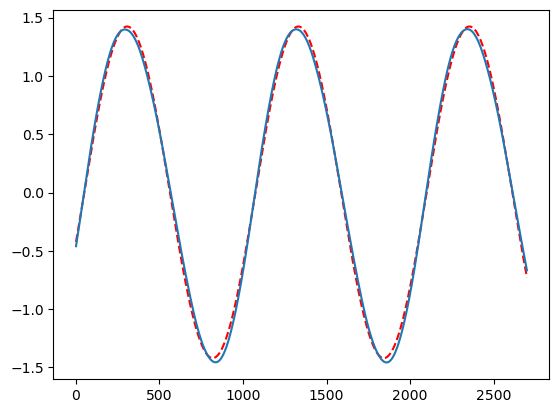

In [12]:
#Guess values
guess_mean = np.mean(Vr_magg) #off-set:d
guess_std = 3*np.std(Vr_magg)/(2**0.5)/(2**0.5) #amplitude
guess_phase = 80
guess_freq = 0.00655
guess_amp = 0.012

Guess=[guess_amp,guess_freq,guess_phase,guess_mean]
from numpy import sin
def objective(x, a, f, p, o):
	return a * sin(f*x+p) + o

x=np.arange(1,2699)
yx,yy,yz=Uv.T

# curve fit
popt, _ = curve_fit(objective, x, yx, Guess)

# summarize the parameter values
a, b, c, d = popt

# calculate the output for the range
y_line = objective(x, a, b, c, d)

# create a line plot for the mapping function
plt.plot(x, y_line, '--', color='red')

# plt.show()
plt.plot(x,yx)

#Differentiating it
# from scipy.misc import derivative
# # calculating its derivative
# def deriv(x):
#     return derivative(objective(x, a, b, c, d), x)
# plt.show()
# plt.plot(deriv(yx))

In [13]:

# from numpy import arange
# from pandas import read_csv
# from scipy.optimize import curve_fit
# from matplotlib import pyplot

# # define the true objective function
# def objective(x, a, b, c, d, e, f):
# 	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# def objective2(x, a, b, c, d, e, f, g, h, i, j):
# 	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + (f * x**6)+(g * x**7)+(h * x**8)+(i * x**9)+j

# # choose the input and output variables
# x=np.arange(1,2699)
# # curve fit
# popt, _ = curve_fit(objective, x, yx)

# popt2, _ = curve_fit(objective2, x, yx)

# # summarize the parameter values
# a, b, c, d, e, f = popt
# a2, b2, c2, d2, e2, f2, g2, h2, i2, j2 = popt2
# # plot input vs output
# pyplot.plot(x,yx)
# # define a sequence of inputs between the smallest and largest known inputs
# x_line = arange(min(x), max(x), 1)
# # calculate the output for the range
# y_line = objective(x_line, a, b, c, d, e, f)
# y_line2 = objective2(x_line, a, b, c, d, e, f, g, h, i, j)
# # create a line plot for the mapping function
# pyplot.plot(x_line, y_line, '--', color='red')
# #pyplot.plot(x_line, y_line2, '--', color='yellow')
# pyplot.show()

 Probably not working

In [14]:
# #  objective function
# def objective(x, a, b, c, d):
# 	return a * np.sin(b*x + c)+d

# # fit curve
# popt, _ = sc.curve_fit(objective, Time, Vr_maggg)
# a,b,c,d=popt
# print("a=",a)
# print("b=",b)
# print("c=",c)
# print("d=",d)
# y=a*np.sin(b*x+c)+d
# print('y = %f sin(%f* x + %f)+%f' %(a, b, c, d))
# plt.plot(Time,y)
# #plt.plot(Time,Vr_maggg)

In [15]:
# V21x,V21y,V21z=V2_1.T
# Vr_maggg=((V21x)**2+(V21y)**2+(V21z)**2)**(1/2)
# plt.plot(Time,Vr_maggg)

# a=0.01099838894664937
# b=0.00655
# c=89
# d=0.10689047108761018
# x=np.array(range(2698))
# y=a*np.sin(b*x+c)+d
# plt.plot(Time,y)

# #plt.legend(loc="upper left")

In [16]:
# from scipy.optimize import leastsq

# guess_mean = np.mean(Vr_maggg) #off-set:d
# guess_std = 3*np.std(Vr_maggg)/(2**0.5)/(2**0.5) #amplitude
# guess_phase = 89
# guess_freq = 0.00655
# guess_amp = 0.012

# print(guess_mean)
# print(guess_std)

In [17]:
# X=np.array(range(2698))
# data_first_guess = guess_std*np.sin(guess_freq*X+guess_phase) + guess_mean

# optimize_func = lambda x: x[0]*np.sin(x[1]*X+x[2]) + x[3] - Vr_maggg
# est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# data_fit = est_amp*np.sin(est_freq*Time+est_phase) + est_mean

# fine_t = np.arange(0,max(Time),0.1)
# data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

# plt.plot(X, Vr_maggg, '.')
# plt.plot(X, data_first_guess, label='first guess')
# plt.plot(X, data_fit, label='after fitting')
# plt.legend()
# plt.show()

In [18]:
#print(V2_1)
#print(V2_2)
#print(V2_3)

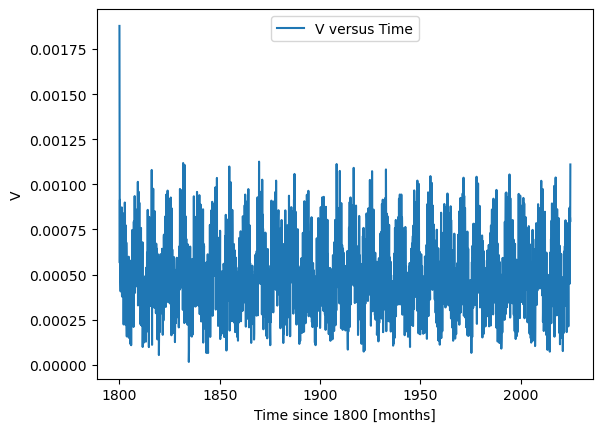

In [19]:
V_RHS=V2_1+V2_2-V2_3
Vrx,Vry,Vrz=V_RHS.T
Vr_mag=((Vrx)**2+(Vry)**2+(Vrz)**2)**(1/2)
plt.plot(Time,Vr_mag,label="V versus Time")

plt.xlabel("Time since 1800 [months]")
plt.ylabel("V")
plt.legend(loc="upper center")

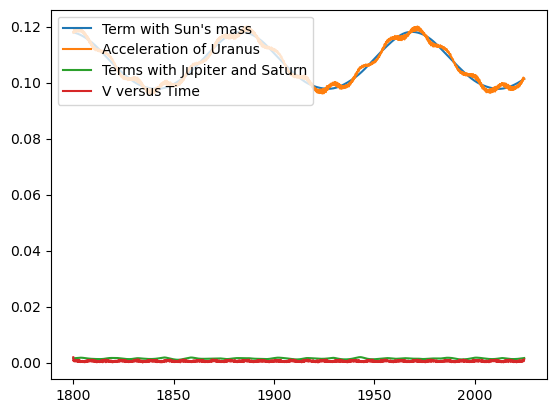

In [20]:
Vrxx,Vryy,Vrzz=V2_2.T
Vr_magg=((Vrxx)**2+(Vryy)**2+(Vrzz)**2)**(1/2)
plt.plot(Time,Vr_magg,label="Term with Sun's mass")

V21x,V21y,V21z=V2_1.T
Vr_maggg=((V21x)**2+(V21y)**2+(V21z)**2)**(1/2)
plt.plot(Time,Vr_maggg,label="Acceleration of Uranus")

V23x,V23y,V23z=V2_3.T
Vr_magggg=((V23x)**2+(V23y)**2+(V23z)**2)**(1/2)
plt.plot(Time,Vr_magggg,label="Terms with Jupiter and Saturn")

plt.plot(Time,Vr_mag,label="V versus Time")
plt.legend(loc="upper left")

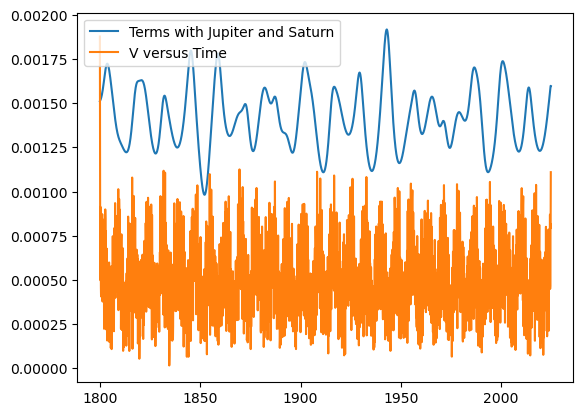

In [21]:
plt.plot(Time,Vr_magggg,label="Terms with Jupiter and Saturn")

plt.plot(Time,Vr_mag,label="V versus Time")
plt.legend(loc="upper left")

## Moving on from V

Text(0, 0.5, '$x_t$')

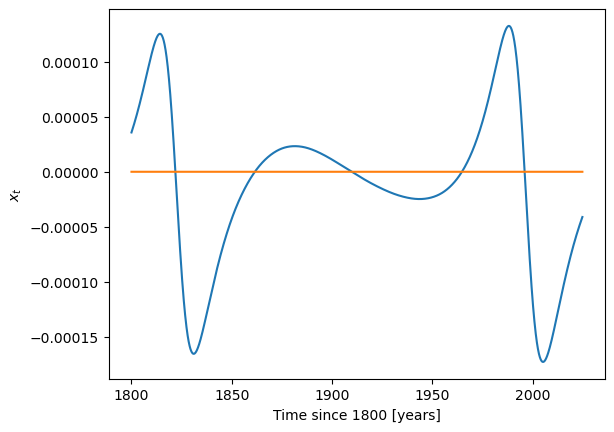

In [22]:
Z=np.zeros(2698)
Z=np.tile(Z,(3,1))
Z=np.transpose(Z)
for i in range(2698):
  Z[i,2]=1


p_t=np.cross(Z,Uranus)
px,py,pz=p_t.T
x_t=Vx*px+Vy*py+Vz*pz

plt.plot(Time,x_t)

Zero=np.zeros(2698)
Zero=np.array(Zero)
plt.plot(Time,Zero)
plt.xlabel("Time since 1800 [years]")
plt.ylabel("$x_t$")

In [23]:
#Finding the roots of x_t
C1=0
a=0
O1=0
b=0
C2=0
t=0
for i in range(2695):

  if x_t[i]<0 and x_t[i+1]>0:
    if t==0:
      C1=Time[i]
      t=t+1
    elif t==1:
      a=Time[i]
      t=t+1
    if t==2:
      O1=Time[i]
      t=t+1
    elif t==3:
      b=Time[i]
      t=t+1
    elif t==5:
      C2=Time[i]
      t=t+1


  if x_t[i]>0 and x_t[i+1]<0:
    if t==0:
      C1=Time[i]
      t=t+1
    elif t==1:
      a=Time[i]
      t=t+1
    if t==2:
      O1=Time[i]
      t=t+1
    elif t==3:
      b=Time[i]
      t=t+1
    elif t==4:
      C2=Time[i]
      t=t+1



print("First Conjunction: ",C1)
#print(a)
print("First opposition: ",b)
#print(b)
print("Second Conunction: ",C2)

C=C2-C1
C=(1-5/365.24218750)*C

print("The Synodic Period of Neptune with respect to Uranus is :",C," years")

First Conjunction:  1821.8333333333333
First opposition:  1909.75
Second Conunction:  1995.9166666666667
The Synodic Period of Neptune with respect to Uranus is : 171.70021140367777  years


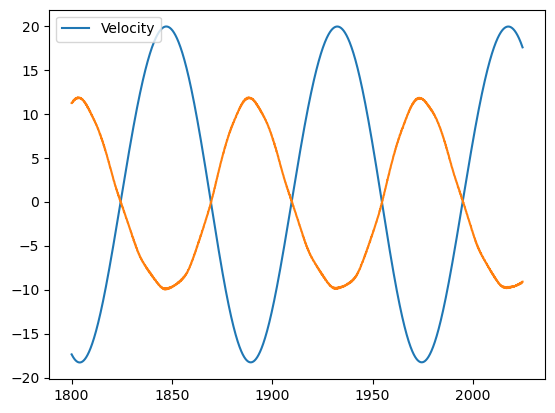

In [24]:
plt.plot(Time,Ux, label="Velocity")
plt.plot(Time,100*V21x)
plt.legend(loc="upper left")
#This indicates that I am calculating the correct acceleration of Uranus
#It's just that its magnitude is extremely small

Text(0, 0.5, 'e_t')

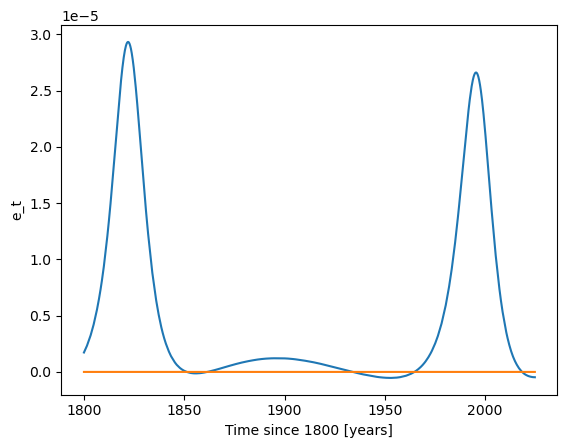

In [25]:
Nu=np.cross(Uranus,Uv)

Nux,Nuy,Nuz=Nu.T
E_t=Vx*Nux+Vy*Nuy+Vz*Nuz
plt.plot(Time,E_t)
plt.plot(Time,Zero)
plt.xlabel("Time since 1800 [years]")
plt.ylabel("e_t")

In [26]:
#Finding the roots of E_t
D1=0
c=0
E1=0
d=0
D2=0
t=0
for i in range(2695):

  if E_t[i]<0 and E_t[i+1]>0:
    if t==0:
      D1=Time[i]
      t=t+1
    elif t==1:
      c=Time[i]
      t=t+1
    if t==2:
      E1=Time[i]
      t=t+1
    elif t==3:
      d=Time[i]
      t=t+1
    elif t==5:
      D2=Time[i]
      t=t+1


  if E_t[i]>0 and E_t[i+1]<0:
    if t==0:
      D1=Time[i]
      t=t+1
    elif t==1:
      c=Time[i]
      t=t+1
    if t==2:
      E1=Time[i]
      t=t+1
    elif t==3:
      d=Time[i]
      t=t+1
    elif t==4:
      D2=Time[i]
      t=t+1

D=D2-D1
D=(1-5/365.24218750)*D
print("The sidereal period for Uranus is: ",D)


The sidereal period for Uranus is:  164.7960382309112


In [27]:
#Calculating the semi-major axis using Kepler's third law
a_u=D**(2/3)
print("Uranus's semi-major axis in AU is:",a_u)

Uranus's semi-major axis in AU is: 30.058306684492365


In [28]:
#Finding the Mass of Neptune:
VVV=V1/V2-Neptune/V3
VVVx,VVVy,VVVz=VVV.T
VVV_mag=((VVVx)**2+(VVVy)**2+(VVVz)**2)**(1/2)

#This won't be a single value but an array of values
Mass_N=V_mag/(VVV_mag*G)

#We print the average of these values
print("The Mass of Neptune is: ",np.sum(Mass_N)/2698)

The Mass of Neptune is:  1.0240000000000001e+26
